# Importing Packages

In [26]:
import numpy as np
from numpy import linalg
from scipy import linalg as splinalg
import matplotlib.pyplot as plt
from scipy import sparse as sp
import scipy.sparse.linalg
from functools import reduce
import itertools
from scipy import linalg
from scipy.linalg import expm, logm
from scipy.special import comb
from itertools import combinations_with_replacement, product
from collections import Counter
import copy
from scipy.linalg import ishermitian
import time
from scipy.integrate import solve_ivp

# Definitions

In [43]:
J = 1.0  # Coupling constant
N, U = 2, 0.5
nu = N*U # Additional constant (nu)
hbar = 1.0  # Planck's constant (normalized)

# def system(t, y):
#     '''
#     Definition of the ODEs.
#     z-value is bound between -1 and 1 due to singularity in eqn-17
#     Args:
#     y: list of initial conditions [phi, z]
#     t: range of time list
#     '''
#     phi_dot = (J * z * np.cos(phi)) / np.sqrt(1 - z**2) + (nu * z) / 4
#     z_dot = -J * np.sqrt(1 - z**2) * np.sin(phi)
#     return [phi_dot, z_dot]

def system(t, y, **kwargs):
    '''
    Definition of the ODEs.
    z-value is bound between -1 and 1 due to singularity in eqn-17.
    
    Args:
    y: list of initial conditions [phi, z]
    t: range of time list
    '''
    phi, z = y  # Unpack y into phi and z
    if np.abs(z) >= 1:
        z = np.sign(z) * 0.999
    phi_dot = (J * z * np.cos(phi)) / np.sqrt(1 - z**2) + (nu * z) / 4
    z_dot = -J * np.sqrt(1 - z**2) * np.sin(phi)
    return [phi_dot, z_dot]


# Initial Conditions and Time-range

In [44]:
# Time range for integration
t_span = (0, 10)
t_eval = np.linspace(*t_span, 500)

# Initial conditions (phi(0), z(0))
initial_conditions = [
    [0.1, 0.5],
    [0.1, -0.5],
    [np.pi/2, 0.3],
    [np.pi/2, -0.3],
    [np.pi, 0.1],
    [np.pi, -0.1],
    [np.pi/4, 0.8],
    [np.pi/4, -0.8],
    [3*np.pi/4, 0.8],
    [3*np.pi/4, -0.8],
    [np.pi, -0.8],
    [np.pi, 0.8],
]

# Plotting Phase Portraits

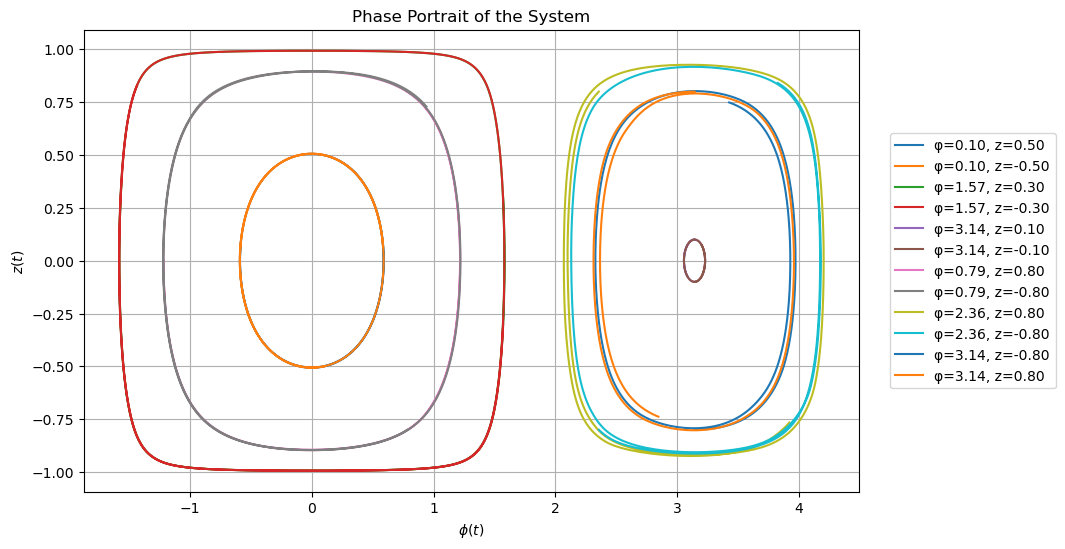

In [45]:
# Plot phase portraits
plt.figure(figsize=(10, 6))

for phi0, z0 in initial_conditions:
    # Solve the system of equations
    sol = solve_ivp(system, t_span, [phi0, z0], t_eval=t_eval, method='RK45')

    # Extract solutions
    phi_vals = sol.y[0]
    z_vals = sol.y[1]
    
    # Plot phase portrait
    plt.plot(phi_vals, z_vals, label=f'φ={phi0:.2f}, z={z0:.2f}')
    
plt.xlabel(r'$\phi(t)$') 
plt.ylabel(r'$z(t)$') 
plt.title('Phase Portrait of the System')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)
plt.grid(True)
plt.show()

In [49]:
z = -0.8
if np.abs(z) >= 1:
        z = np.sign(z) * 0.999

print(z)

-0.8
